# Energy Data Parser

### Scope for *next* notebook
- outliers
- trend analysis for bad points
- interpolate/resample for missing cells
- ???

In [9]:
# Preliminary setup
import pandas as pd
import zipfile
import os
import matplotlib.pyplot as plt

In [10]:
df = pd.read_pickle('alldata.pickle')

In [11]:
# Check datatypes
df.head(1)
df.dtypes

# Change object datatypes to float64 and '?' cells to NaN, since all are numerical columns
df['active'] = pd.to_numeric(df['active'], errors='coerce')
df['reactive'] = pd.to_numeric(df['reactive'], errors='coerce')
df['volts'] = pd.to_numeric(df['volts'], errors='coerce')
df['amps'] = pd.to_numeric(df['amps'], errors='coerce')
df['sub1'] = pd.to_numeric(df['sub1'], errors='coerce')
df['sub2'] = pd.to_numeric(df['sub2'], errors='coerce')

# Check that all numerical columns are float64
df.dtypes

active      float64
reactive    float64
volts       float64
amps        float64
sub1        float64
sub2        float64
sub3        float64
dtype: object

In [12]:
# How strict is the index, ie. what is the time difference between consecutive elements?
from collections import Counter
deltas = [d for d in map(lambda a: a[1] - a[0], zip(df.index, df.index[1:]))]
Counter(deltas)

Counter({Timedelta('0 days 00:01:00'): 2075258})

In [13]:
# Deal with NaN cells

# Show rows with nulls
dfnulls = df[df.isnull().any(axis=1)]
dfnulls

,active,reactive,volts,amps,sub1,sub2,sub3
dtime,,,,,,,
2006-12-21 11:23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-21 11:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-30 10:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-30 10:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-14 18:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-28 17:13:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-02-22 22:58:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-02-22 22:59:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-03-25 17:52:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# How many rows have a missing sample?
n_missing = sum(df.isnull().any(axis=1))
n_missing

25979

In [15]:
# What percentage of rows is missing samples?
"{}%".format(round(n_missing / len(df) * 100, 4))

'1.2518%'

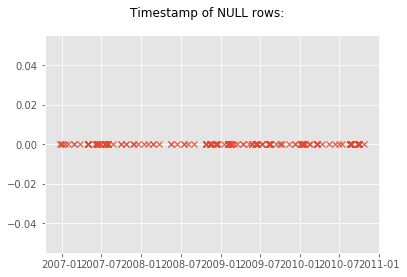

In [16]:
# Looks like all columns are NaN at once...
# Check the time positions of these
df1 = dfnulls.fillna(value=0)

plt.style.use('ggplot')

fig = plt.figure()
fig.suptitle('Timestamp of NULL rows:')
ax = plt.axes()
ts = df1['active']
ax.plot(ts, marker='x', linewidth=0)

# Check time periods between NaN rows
deltas = [d for d in map(lambda a: a[1] - a[0], zip(dfnulls.index, dfnulls.index[1:]))]
deltas

# Remove rows with NaN
df2 = df.dropna(how='any')

In [17]:
df2.to_pickle("alldata_clean.pickle")